In [62]:
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
import calendar
import seaborn as sns

In [76]:
#mycode
bike=pd.read_csv('bike.csv')

del bike['casual']
del bike['registered']

bike['datetime']=pd.to_datetime(bike['datetime'],format="%Y-%m-%d")

train_condition1=bike['datetime'].dt.year<=2012 
train_condition2=bike['datetime'].dt.month<=10
train_input=bike.copy()
train_target=train_input['count'].copy()
train_input['datetime']=train_input['datetime'].dt.hour
del train_input['count']
train_input.to_numpy()
train_target.to_numpy()

test_condition1=bike['datetime'].dt.year>=2012 
test_condition2=bike['datetime'].dt.month>10
test_input=bike[test_condition1&test_condition2].copy()
test_target=test_input['count'].copy()
test_input['datetime']=test_input['datetime'].dt.hour
del test_input['count']
test_input.to_numpy()
test_target.to_numpy()

model=RandomForestRegressor(oob_score=True)
model.fit(train_input,train_target)

model.oob_score_


0.850189652880993

In [69]:
bike=pd.read_csv('bike.csv')

del bike['casual']
del bike['registered']

bike['datetime']=pd.to_datetime(bike['datetime'],format="%Y-%m-%d")

bike['year']=bike['datetime'].dt.year
bike['month']=bike['datetime'].dt.month
bike['day']=bike['datetime'].dt.day
bike['hour']=bike['datetime'].dt.hour

week_box=[]
for year,month,day in zip(bike['year'],bike['month'],bike['day']):
    week=calendar.weekday(year,month,day)
    week_box.append(week)

bike['weekday']=week_box

del bike['datetime']

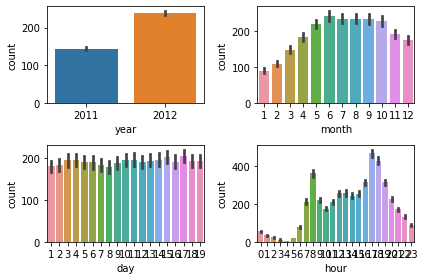

In [63]:
fig = plt.figure()

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.barplot(x='year',y='count',data=bike,ax=ax1)
sns.barplot(x='month',y='count',data=bike,ax=ax2)
sns.barplot(x='day',y='count',data=bike,ax=ax3)
sns.barplot(x='hour',y='count',data=bike,ax=ax4)

plt.tight_layout()

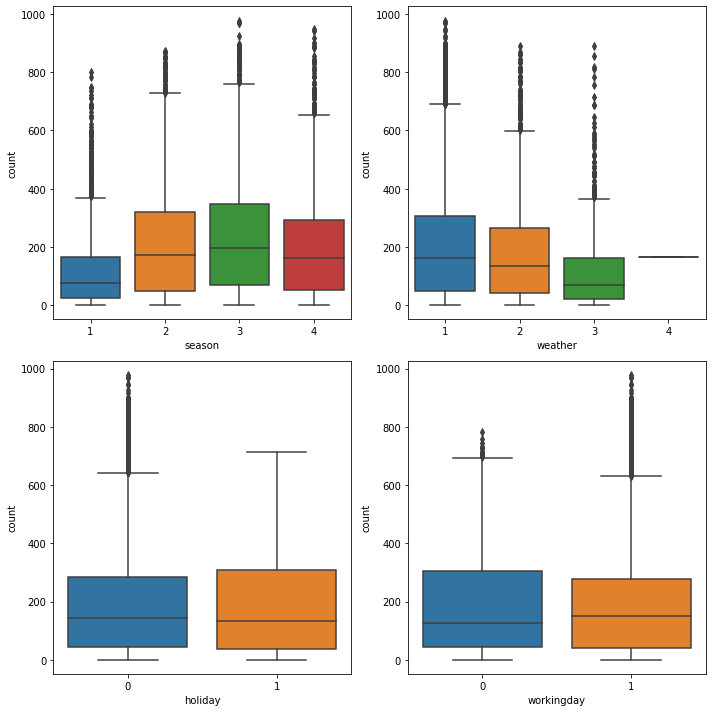

In [66]:
fig = plt.figure(figsize=(10,10))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.boxplot(x='season',y='count',data=bike,ax=ax1)
sns.boxplot(x='weather',y='count',data=bike,ax=ax2)#weather 4번에 이상
sns.boxplot(x='holiday',y='count',data=bike,ax=ax3)
sns.boxplot(x='workingday',y='count',data=bike,ax=ax4)

plt.tight_layout()

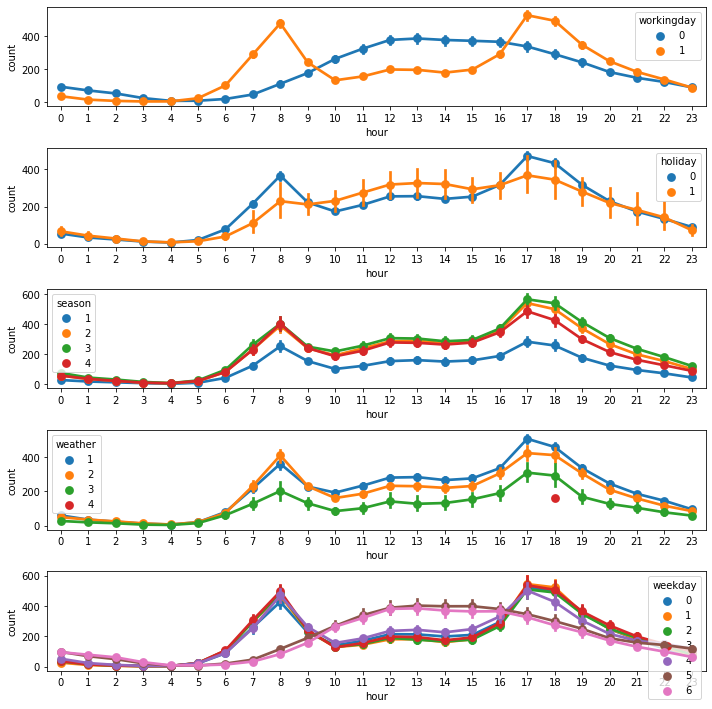

In [70]:
fig = plt.figure(figsize=(10,10))

ax1=fig.add_subplot(5,1,1)
ax2=fig.add_subplot(5,1,2)
ax3=fig.add_subplot(5,1,3)
ax4=fig.add_subplot(5,1,4)
ax5=fig.add_subplot(5,1,5)

sns.pointplot(x='hour',y='count',data=bike,ax=ax1,hue="workingday")
sns.pointplot(x='hour',y='count',data=bike,ax=ax2,hue="holiday")
sns.pointplot(x='hour',y='count',data=bike,ax=ax3,hue="season")
sns.pointplot(x='hour',y='count',data=bike,ax=ax4,hue="weather")
sns.pointplot(x='hour',y='count',data=bike,ax=ax5,hue="weekday")

plt.tight_layout()

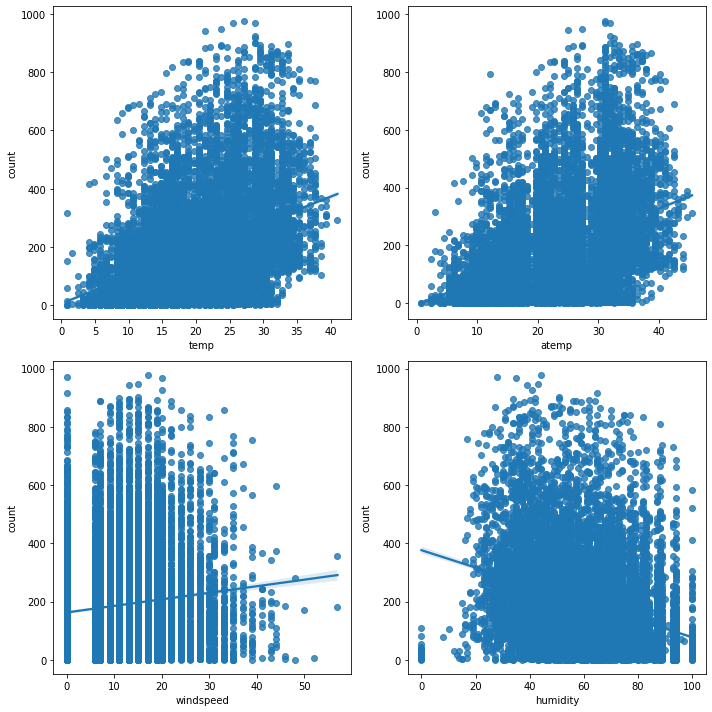

In [71]:
fig = plt.figure(figsize=(10,10))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.regplot(x='temp',y='count',data=bike,ax=ax1)
sns.regplot(x='atemp',y='count',data=bike,ax=ax2)
sns.regplot(x='windspeed',y='count',data=bike,ax=ax3)#windspeed에 신뢰성이 낮음. 바람 속도 0인 시간이 너무 많음.
sns.regplot(x='humidity',y='count',data=bike,ax=ax4)#humidity에 신뢰성이 의심됨.

plt.tight_layout()

In [73]:
del bike['windspeed']
#windspeed : 신뢰성이 낮아서 삭제

KeyError: ignored

In [74]:
bike=bike[bike['weather']!=4]
#이상한 데이터 삭제
bike

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,129,2012,12,19,22,2


In [75]:
data=bike.loc[:,bike.columns != 'count'].to_numpy()
target=bike['count'].to_numpy()

rf=RandomForestRegressor(oob_score=True)
rf.fit(data,target)
rf.oob_score_

0.9538318104035225